In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
#
PSQL_USER='dengueadmin' # EDITED*
PSQL_PASSWORD='aldengue' # EDITED*
PSQL_HOST='159.69.25.201' # EDITED*
PSQL_PORT='25432'
PSQL_DB='dengue'
PSQL_URI = f"postgresql://{PSQL_USER}:{PSQL_PASSWORD}@{PSQL_HOST}:{PSQL_PORT}/{PSQL_DB}"

db_engine =  create_engine(PSQL_URI)

#
def weather_data(geocode: int = 4108304):

    SQL = f"SELECT * FROM weather.copernicus_brasil WHERE geocodigo={geocode};"

    df = pd.read_sql_query(SQL, db_engine)
    
    return df 

In [3]:
%%time
df_we = weather_data()
df_we.set_index('time', inplace = True)
df_we.index = pd.to_datetime(df_we.index)
df_we = df_we.sort_index()
df_we = df_we.loc[(df_we.index >= '2010-01-01') & (df_we.index <= '2022-06-30') ]
df_we.head()

CPU times: user 84.8 ms, sys: 27.7 ms, total: 112 ms
Wall time: 18 s


,index,geocodigo,temp_min,temp_med,temp_max,precip_min,precip_med,precip_max,pressao_min,pressao_med,pressao_max,umid_min,umid_med,umid_max
time,,,,,,,,,,,,,,
2010-01-01,38976464,4108304,23.641235,26.993378,30.980988,0.0,0.002311,0.01222,0.993683,0.994886,0.996496,57.703090,73.22809,84.06518
2010-01-02,38976465,4108304,22.889832,27.506794,32.303130,0.0,0.017714,0.12784,0.993488,0.995670,0.997243,59.779620,73.78319,85.58071
2010-01-03,38976466,4108304,24.740020,28.016045,32.177094,0.0,0.037080,0.15691,0.994498,0.996239,0.997873,61.412437,77.32461,86.89917
2010-01-04,38976467,4108304,25.143219,28.401638,31.965546,0.0,0.024692,0.16286,0.995208,0.996773,0.998475,63.779186,76.08106,87.03062
2010-01-05,38976468,4108304,24.982880,29.031345,33.445496,0.0,0.005781,0.04625,0.991568,0.995165,0.996801,51.933334,72.67995,89.34562


In [4]:
from get_data import get_weather_data

df_old = get_weather_data()

df_old

,daily_precipitation-mm,temp_max-celsius,temp_min-celsius,temp_mean-celsius,mean_relative_humidity-%,mean_wind_speed-m_per_s
date,,,,,,
2010-01-01,0.0,31.1,23.9,26.7,72.1,1.7
2010-01-02,2.2,32.9,23.8,27.2,75.3,1.3
2010-01-03,0.0,32.3,25.6,28.4,73.2,1.7
2010-01-04,1.6,33.9,24.6,28.5,75.5,2.5
2010-01-05,0.2,35.2,25.5,29.5,69.1,2.6
...,...,...,...,...,...,...
2022-06-26,0.0,19.2,14.7,16.5,91.7,0.7
2022-06-27,0.0,24.3,12.7,17.5,83.9,1.3
2022-06-28,0.0,24.2,12.7,18.2,80.2,1.8


In [5]:
df_old.columns

Index(['daily_precipitation-mm', 'temp_max-celsius', 'temp_min-celsius',
       'temp_mean-celsius', 'mean_relative_humidity-%',
       'mean_wind_speed-m_per_s'],
      dtype='object')

Comparando as curvas:

Temperatura média:

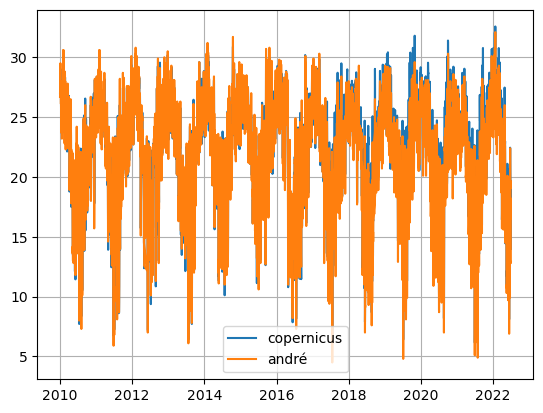

In [6]:
fig, ax = plt.subplots()

ax.plot(df_we.temp_med, label = 'copernicus')
ax.plot(df_old['temp_mean-celsius'], label = 'andré')

ax.legend()
ax.grid()

plt.show()

-10.324057755637531
7.236422857142857


Temperatura máxima:

Min dif: -11.073140032069968
Max_dif 8.447271999999998


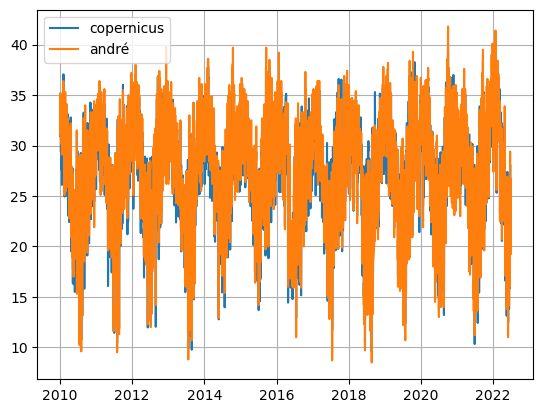

In [13]:
fig, ax = plt.subplots()

print('Min dif:', min(df_old['temp_max-celsius'] - df_we.temp_max))
#print(mean(df_old['temp_mean-celsius'] - df_we.temp_med))
print('Max_dif', max(df_old['temp_max-celsius'] - df_we.temp_max))

ax.plot(df_we.temp_max, label = 'copernicus')
ax.plot(df_old['temp_max-celsius'], label = 'andré')

ax.legend()
ax.grid()

plt.show()

Temperatura mínima:

Min dif: -11.8414
Max_dif 7.543950571428571


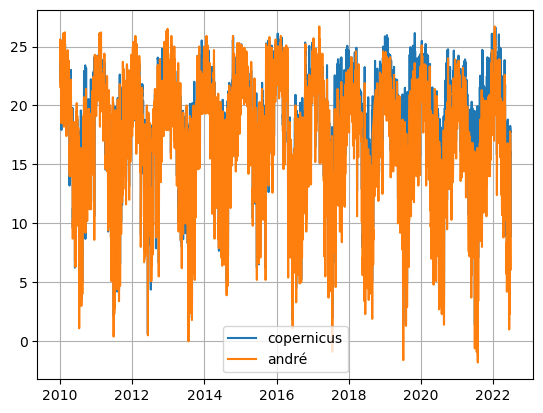

In [14]:
fig, ax = plt.subplots()

print('Min dif:', min(df_old['temp_min-celsius'] - df_we.temp_min))
#print(mean(df_old['temp_mean-celsius'] - df_we.temp_med))
print('Max_dif', max(df_old['temp_min-celsius'] - df_we.temp_min))

ax.plot(df_we.temp_min, label = 'copernicus')
ax.plot(df_old['temp_min-celsius'], label = 'andré')

ax.legend()
ax.grid()

plt.show()

Precipitação:

In [16]:
df_old.columns

Index(['daily_precipitation-mm', 'temp_max-celsius', 'temp_min-celsius',
       'temp_mean-celsius', 'mean_relative_humidity-%',
       'mean_wind_speed-m_per_s'],
      dtype='object')

Min dif: -2.2618214
Max_dif 155.48694003999998


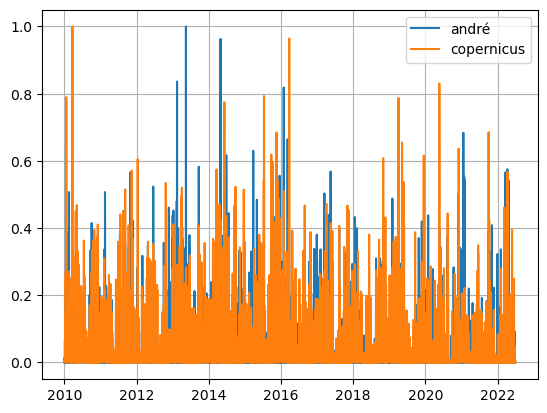

In [21]:
fig, ax = plt.subplots()

print('Min dif:', min(df_old['daily_precipitation-mm'] - df_we.precip_med))
#print(mean(df_old['temp_mean-celsius'] - df_we.temp_med))
print('Max_dif', max(df_old['daily_precipitation-mm'] - df_we.precip_med))

ax.plot((df_old['daily_precipitation-mm'])/max(df_old['daily_precipitation-mm']), label = 'andré')
ax.plot(df_we.precip_med/ max(df_we.precip_med),  label = 'copernicus')

ax.legend()
ax.grid()

plt.show()